In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression, Lasso , Ridge ,LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.metrics import f1_score,classification_report,roc_curve,roc_auc_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder , LabelEncoder,MinMaxScaler
from sklearn import linear_model
import math
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor , plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier , RandomForestRegressor
from sklearn.datasets import load_iris
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import SGDClassifier
import warnings
import module as md
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [2]:
df= pd.read_csv("placementdata.csv")
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.50,1,1,1,65,4.40,No,No,61,79,NotPlaced
1,2,8.90,0,3,2,90,4.00,Yes,Yes,78,82,Placed
2,3,7.30,1,2,2,82,4.80,Yes,No,79,80,NotPlaced
3,4,7.50,1,1,2,85,4.40,Yes,Yes,81,80,Placed
4,5,8.30,1,2,2,86,4.50,Yes,Yes,74,88,Placed


### EDA

In [3]:
df.shape 

(10000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [5]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,7.70,1.05,2.03,1.01,79.45,4.32,69.16,74.50
std,2886.90,0.64,0.67,0.87,0.90,8.16,0.41,10.43,8.92
min,1.00,6.50,0.00,0.00,0.00,60.00,3.00,55.00,57.00
25%,2500.75,7.40,1.00,1.00,0.00,73.00,4.00,59.00,67.00
50%,5000.50,7.70,1.00,2.00,1.00,80.00,4.40,70.00,73.00
75%,7500.25,8.20,1.00,3.00,2.00,87.00,4.70,78.00,83.00
max,10000.00,9.10,2.00,3.00,3.00,90.00,4.80,90.00,88.00


In [6]:
df = df.rename(columns={'Workshops/Certifications': 'Workshops_Certifications'})

In [7]:
df.duplicated().sum()

0

In [8]:
df=df.drop(columns="StudentID",axis=1)

In [9]:
df.duplicated().sum()

72

In [10]:
df=df.drop_duplicates()

In [11]:
df.isna().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops_Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [12]:
df["ExtracurricularActivities"]=df["ExtracurricularActivities"].replace("No",0)
df["ExtracurricularActivities"]=df["ExtracurricularActivities"].replace("Yes",1)

In [13]:
df["PlacementTraining"]=df["PlacementTraining"].replace("No",0)
df["PlacementTraining"]=df["PlacementTraining"].replace("Yes",1)

In [14]:
df["PlacementStatus"]=df["PlacementStatus"].replace("NotPlaced",0)
df["PlacementStatus"]=df["PlacementStatus"].replace("Placed",1)

In [15]:
df.head()

,CGPA,Internships,Projects,Workshops_Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.50,1,1,1,65,4.40,0,0,61,79,0
1,8.90,0,3,2,90,4.00,1,1,78,82,1
2,7.30,1,2,2,82,4.80,1,0,79,80,0
3,7.50,1,1,2,85,4.40,1,1,81,80,1
4,8.30,1,2,2,86,4.50,1,1,74,88,1


In [16]:
md.data_info(df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,CGPA,float64,27,9928,0,"[7.5, 8.9, 7.3, 8.3, 7.0, 7.7, 6.5, 7.8, 7.9, ..."
1,Internships,int64,3,9928,0,"[1, 0, 2]"
2,Projects,int64,4,9928,0,"[1, 3, 2, 0]"
3,Workshops_Certifications,int64,4,9928,0,"[1, 2, 0, 3]"
4,AptitudeTestScore,int64,31,9928,0,"[65, 90, 82, 85, 86, 71, 76, 84, 79, 74, 66, 7..."
5,SoftSkillsRating,float64,19,9928,0,"[4.4, 4.0, 4.8, 4.5, 4.2, 3.5, 3.9, 4.6, 4.1, ..."
6,ExtracurricularActivities,int64,2,9928,0,"[0, 1]"
7,PlacementTraining,int64,2,9928,0,"[0, 1]"
8,SSC_Marks,int64,36,9928,0,"[61, 78, 79, 81, 74, 55, 62, 59, 75, 85, 82, 7..."
9,HSC_Marks,int64,32,9928,0,"[79, 82, 80, 88, 66, 65, 72, 71, 86, 87, 83, 7..."


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9928 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       9928 non-null   float64
 1   Internships                9928 non-null   int64  
 2   Projects                   9928 non-null   int64  
 3   Workshops_Certifications   9928 non-null   int64  
 4   AptitudeTestScore          9928 non-null   int64  
 5   SoftSkillsRating           9928 non-null   float64
 6   ExtracurricularActivities  9928 non-null   int64  
 7   PlacementTraining          9928 non-null   int64  
 8   SSC_Marks                  9928 non-null   int64  
 9   HSC_Marks                  9928 non-null   int64  
 10  PlacementStatus            9928 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 930.8 KB


<Axes: >

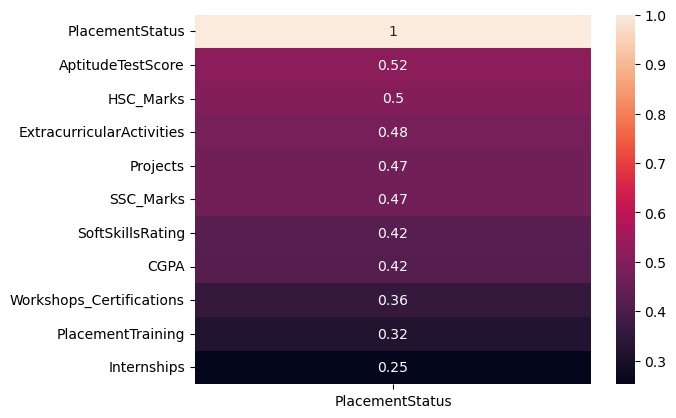

In [18]:
corr_with_PlacementStatus = df.corr().abs()[['PlacementStatus']].sort_values(by='PlacementStatus', ascending=False)
sns.heatmap(corr_with_PlacementStatus, annot=True)

<Axes: >

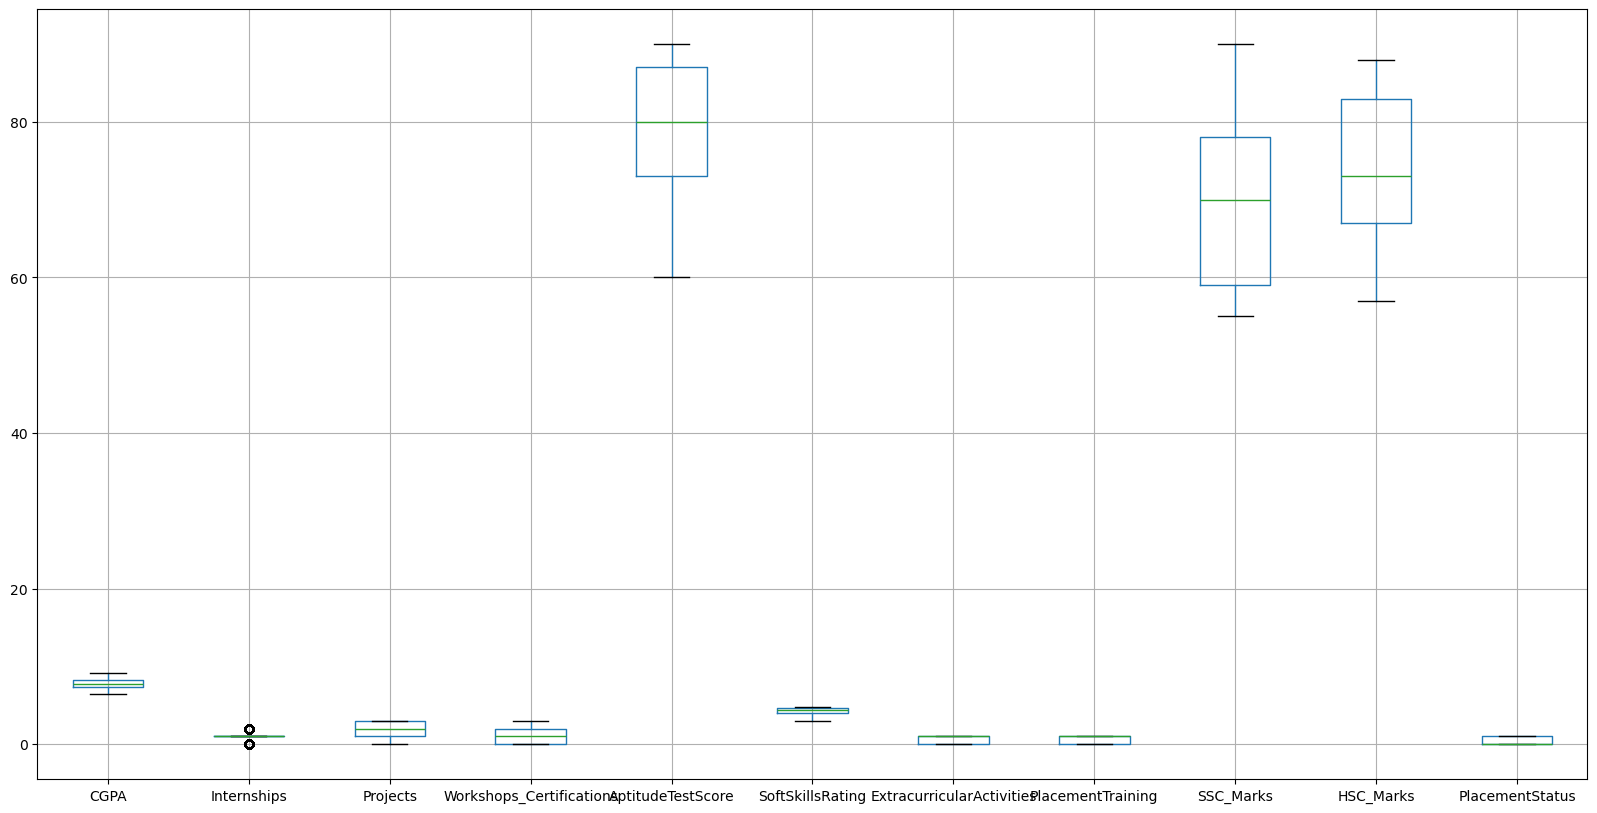

In [19]:
df.boxplot(figsize=(20,10))

In [20]:
x=df.drop(columns="PlacementStatus",axis=1)
y=df["PlacementStatus"]

In [21]:
df["PlacementStatus"].value_counts()

PlacementStatus
0    5801
1    4127
Name: count, dtype: int64

### MODELS

### not scaled 

In [22]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (5956, 10)
x_val shape: (1986, 10)
x_test shape: (1986, 10)
y_train shape: (5956,)
y_val shape: (1986,)
y_test shape: (1986,)


In [23]:
clf = LazyClassifier(verbose = 0,ignore_warnings= True,random_state= 42,classifiers= "all")
models, predictions = clf.fit(x_train, x_val, y_train, y_val)
models

100%|██████████| 32/32 [00:05<00:00,  6.11it/s]

[LightGBM] [Info] Number of positive: 2497, number of negative: 3459
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 5956, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419241 -> initscore=-0.325890
[LightGBM] [Info] Start training from score -0.325890


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.81,0.81,0.81,0.81,0.01
GaussianNB,0.81,0.81,0.81,0.81,0.01
NearestCentroid,0.80,0.81,0.81,0.81,0.01
LogisticRegression,0.81,0.81,0.81,0.81,0.02
BernoulliNB,0.81,0.81,0.81,0.81,0.02
LinearDiscriminantAnalysis,0.81,0.81,0.81,0.81,0.02
RidgeClassifierCV,0.81,0.81,0.81,0.81,0.01
RidgeClassifier,0.81,0.81,0.81,0.81,0.02
CalibratedClassifierCV,0.81,0.81,0.81,0.81,0.04


In [24]:
from sklearn.svm import LinearSVC

LinearSVC_clf = LinearSVC(random_state=42)

LinearSVC_clf.fit(x_train, y_train)

y_pred_train = LinearSVC_clf.predict(x_train)

print('acc_train:',accuracy_score(y_train, y_pred_train))
print('f1_train:', f1_score(y_train, y_pred_train))
print('recall_score_train:', recall_score(y_train, y_pred_train))
print('precision_score_train:',precision_score(y_train, y_pred_train))
print('confusion_matrix_train:', confusion_matrix(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = LinearSVC_clf.predict(x_val)

print('acc_test:',accuracy_score(y_val, y_pred_val))
print('f1_test:', f1_score(y_val, y_pred_val))
print('recall_score_test:', recall_score(y_val, y_pred_val))
print('precision_score_test:', precision_score(y_val, y_pred_val))
print('confusion_matrix_test:', confusion_matrix(y_val, y_pred_val))
print('classification_report_test:\n', classification_report(y_val, y_pred_val))

acc_train: 0.7919744795164539
f1_train: 0.7555730913395147
recall_score_train: 0.7669203043652383
precision_score_train: 0.744556765163297
confusion_matrix_train: [[2802  657]
 [ 582 1915]]
classification_report_train:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      3459
           1       0.74      0.77      0.76      2497

    accuracy                           0.79      5956
   macro avg       0.79      0.79      0.79      5956
weighted avg       0.79      0.79      0.79      5956

**************************************************
acc_test: 0.8101711983887211
f1_test: 0.7773183697578263
recall_score_test: 0.7824019024970273
precision_score_test: 0.7723004694835681
confusion_matrix_test: [[951 194]
 [183 658]]
classification_report_test:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1145
           1       0.77      0.78      0.78       841

    accuracy               

In [25]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],  
    "max_iter": [1000, 5000, 10000], 
    "dual": [False],  
}
LinearSVC_clf = LinearSVC(random_state=42)

grid_search = GridSearchCV(LinearSVC_clf, param_grid, cv=5, scoring="f1", verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

print( grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(x_train)

print('acc_train:', accuracy_score(y_train, y_pred_train))
print('f1_train:', f1_score(y_train, y_pred_train))
print('recall_train:', recall_score(y_train, y_pred_train))
print('precision_train:', precision_score(y_train, y_pred_train))
print('confusion_matrix_train:\n', confusion_matrix(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print("*" * 50)

y_pred_val = best_model.predict(x_val)

print('acc_val:', accuracy_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))
print('recall_val:', recall_score(y_val, y_pred_val))
print('precision_val:', precision_score(y_val, y_pred_val))
print('confusion_matrix_val:\n', confusion_matrix(y_val, y_pred_val))
print('classification_report_val:\n', classification_report(y_val, y_pred_val))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 10, 'dual': False, 'max_iter': 1000}
acc_train: 0.7926460711887172
f1_train: 0.7559770796285319
recall_train: 0.7661193432118543
precision_train: 0.7460998439937597
confusion_matrix_train:
 [[2808  651]
 [ 584 1913]]
classification_report_train:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      3459
           1       0.75      0.77      0.76      2497

    accuracy                           0.79      5956
   macro avg       0.79      0.79      0.79      5956
weighted avg       0.79      0.79      0.79      5956

**************************************************
acc_val: 0.81067472306143
f1_val: 0.7777777777777778
recall_val: 0.7824019024970273
precision_val: 0.7732079905992949
confusion_matrix_val:
 [[952 193]
 [183 658]]
classification_report_val:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1145
       

### scaled

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
X_val = scaler.transform(x_val)

In [27]:
clf_scaled = LazyClassifier(verbose = 0,ignore_warnings= True,random_state= 42,classifiers= "all")
models, predictions = clf.fit(x_train, x_val, y_train, y_val)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 31/32 [00:09<00:00,  3.10it/s]

[LightGBM] [Info] Number of positive: 2497, number of negative: 3459
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 5956, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419241 -> initscore=-0.325890
[LightGBM] [Info] Start training from score -0.325890


100%|██████████| 32/32 [00:09<00:00,  3.30it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.81,0.81,0.81,0.81,0.03
GaussianNB,0.81,0.81,0.81,0.81,0.01
NearestCentroid,0.80,0.81,0.81,0.81,0.02
LogisticRegression,0.81,0.81,0.81,0.81,0.04
BernoulliNB,0.81,0.81,0.81,0.81,0.01
LinearDiscriminantAnalysis,0.81,0.81,0.81,0.81,0.03
RidgeClassifierCV,0.81,0.81,0.81,0.81,0.05
RidgeClassifier,0.81,0.81,0.81,0.81,0.03
CalibratedClassifierCV,0.81,0.81,0.81,0.81,0.04


In [28]:
from sklearn.svm import LinearSVC

LinearSVC_clf_scaled = LinearSVC(random_state=42)

LinearSVC_clf_scaled.fit(x_train, y_train)

y_pred_train = LinearSVC_clf_scaled.predict(x_train)

print('acc_train:',accuracy_score(y_train, y_pred_train))
print('f1_train:', f1_score(y_train, y_pred_train))
print('recall_score_train:', recall_score(y_train, y_pred_train))
print('precision_score_train:',precision_score(y_train, y_pred_train))
print('confusion_matrix_train:', confusion_matrix(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = LinearSVC_clf_scaled.predict(x_val)

print('acc_test:',accuracy_score(y_val, y_pred_val))
print('f1_test:', f1_score(y_val, y_pred_val))
print('recall_score_test:', recall_score(y_val, y_pred_val))
print('precision_score_test:', precision_score(y_val, y_pred_val))
print('confusion_matrix_test:', confusion_matrix(y_val, y_pred_val))
print('classification_report_test:\n', classification_report(y_val, y_pred_val))

acc_train: 0.7919744795164539
f1_train: 0.7555730913395147
recall_score_train: 0.7669203043652383
precision_score_train: 0.744556765163297
confusion_matrix_train: [[2802  657]
 [ 582 1915]]
classification_report_train:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      3459
           1       0.74      0.77      0.76      2497

    accuracy                           0.79      5956
   macro avg       0.79      0.79      0.79      5956
weighted avg       0.79      0.79      0.79      5956

**************************************************
acc_test: 0.8101711983887211
f1_test: 0.7773183697578263
recall_score_test: 0.7824019024970273
precision_score_test: 0.7723004694835681
confusion_matrix_test: [[951 194]
 [183 658]]
classification_report_test:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1145
           1       0.77      0.78      0.78       841

    accuracy               

### Oversampling scaled

In [29]:
sm = SMOTE(random_state=42)
X_over,y_over = sm.fit_resample(x,y)

In [30]:
x_train, x_temp, y_train, y_temp = train_test_split(X_over,y_over , test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (6961, 10)
x_val shape: (2320, 10)
x_test shape: (2321, 10)
y_train shape: (6961,)
y_val shape: (2320,)
y_test shape: (2321,)


In [31]:
clf_Oversampling_scaled = LazyClassifier(verbose = 0,ignore_warnings= True,random_state= 42,classifiers= "all")
models, predictions = clf.fit(x_train, x_val, y_train, y_val)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 31/32 [00:13<00:00,  2.55it/s]

[LightGBM] [Info] Number of positive: 3498, number of negative: 3463
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 6961, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502514 -> initscore=0.010056
[LightGBM] [Info] Start training from score 0.010056


100%|██████████| 32/32 [00:13<00:00,  2.32it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.80,0.80,0.80,0.80,0.38
RandomForestClassifier,0.80,0.80,0.80,0.80,0.83
ExtraTreesClassifier,0.80,0.80,0.80,0.80,0.77
CalibratedClassifierCV,0.79,0.79,0.79,0.79,0.08
LinearSVC,0.79,0.79,0.79,0.79,0.03
NuSVC,0.79,0.79,0.79,0.79,3.16
RidgeClassifierCV,0.79,0.79,0.79,0.79,0.04
RidgeClassifier,0.79,0.79,0.79,0.79,0.02
LinearDiscriminantAnalysis,0.79,0.79,0.79,0.79,0.03


In [32]:
rfc_over_clf = RandomForestClassifier(random_state=42)

rfc_over_clf.fit(x_train, y_train)

y_pred_train = rfc_over_clf.predict(x_train)

print('acc_train:',accuracy_score(y_train, y_pred_train))
print('f1_train:', f1_score(y_train, y_pred_train))
print('recall_score_train:', recall_score(y_train, y_pred_train))
print('precision_score_train:',precision_score(y_train, y_pred_train))
print('confusion_matrix_train:', confusion_matrix(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = rfc_over_clf.predict(x_val)

print('acc_test:',accuracy_score(y_val, y_pred_val))
print('f1_test:', f1_score(y_val, y_pred_val))
print('recall_score_test:', recall_score(y_val, y_pred_val))
print('precision_score_test:', precision_score(y_val, y_pred_val))
print('confusion_matrix_test:', confusion_matrix(y_val, y_pred_val))
print('classification_report_test:\n', classification_report(y_val, y_pred_val))

acc_train: 0.9995690274385864
f1_train: 0.9995712448192082
recall_score_train: 0.9997141223556318
precision_score_train: 0.9994284081166047
confusion_matrix_train: [[3461    2]
 [   1 3497]]
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       1.00      1.00      1.00      3498

    accuracy                           1.00      6961
   macro avg       1.00      1.00      1.00      6961
weighted avg       1.00      1.00      1.00      6961

**************************************************
acc_test: 0.8025862068965517
f1_test: 0.8088480801335559
recall_score_test: 0.8170320404721754
precision_score_test: 0.8008264462809918
confusion_matrix_test: [[893 241]
 [217 969]]
classification_report_test:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1134
           1       0.80      0.82      0.81      1186

    accuracy              

In [33]:
rfc_over_clf = RandomForestClassifier(
    n_estimators=1000,      
    max_depth=10,          
    min_samples_split=50,   
    min_samples_leaf=50,     
    random_state=42,)

rfc_over_clf.fit(x_train, y_train)

y_pred_train = rfc_over_clf.predict(x_train)

print('acc_train:', accuracy_score(y_train, y_pred_train))
print('f1_train:', f1_score(y_train, y_pred_train))
print('recall_score_train:', recall_score(y_train, y_pred_train))
print('precision_score_train:', precision_score(y_train, y_pred_train))
print('confusion_matrix_train:\n', confusion_matrix(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print("*" * 50)

y_pred_val = rfc_over_clf.predict(x_val)

print('acc_val:', accuracy_score(y_val, y_pred_val))
print('f1_val:', f1_score(y_val, y_pred_val))
print('recall_val:', recall_score(y_val, y_pred_val))
print('precision_val:', precision_score(y_val, y_pred_val))
print('confusion_matrix_val:\n', confusion_matrix(y_val, y_pred_val))
print('classification_report_val:\n', classification_report(y_val, y_pred_val))


acc_train: 0.802039936790691
f1_train: 0.8043169554103948
recall_score_train: 0.8096054888507719
precision_score_train: 0.7990970654627539
confusion_matrix_train:
 [[2751  712]
 [ 666 2832]]
classification_report_train:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      3463
           1       0.80      0.81      0.80      3498

    accuracy                           0.80      6961
   macro avg       0.80      0.80      0.80      6961
weighted avg       0.80      0.80      0.80      6961

**************************************************
acc_val: 0.7922413793103448
f1_val: 0.7974789915966387
recall_val: 0.8001686340640809
precision_val: 0.7948073701842546
confusion_matrix_val:
 [[889 245]
 [237 949]]
classification_report_val:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1134
           1       0.79      0.80      0.80      1186

    accuracy                           0.79

<Axes: >

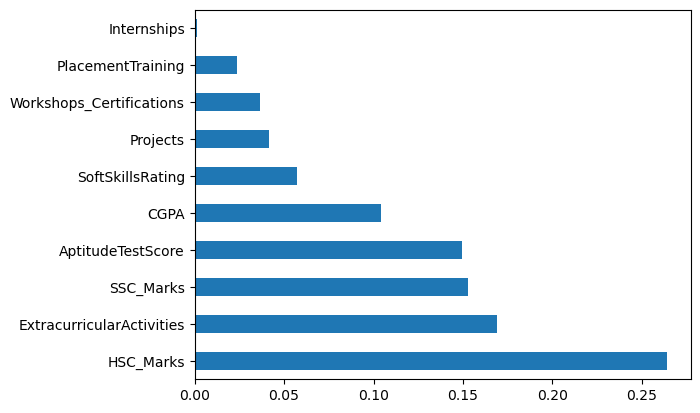

In [34]:
feature_importance = pd.Series(rfc_over_clf.feature_importances_, index=x.columns)
feature_importance.nlargest(10).plot(kind='barh')
#من شات 

### undersampling scaled

In [35]:
rus = RandomUnderSampler(random_state=42)
X_under,y_under = rus.fit_resample(x,y)

In [36]:
x_train, x_temp, y_train, y_temp = train_test_split(X_under,y_under , test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (4952, 10)
x_val shape: (1651, 10)
x_test shape: (1651, 10)
y_train shape: (4952,)
y_val shape: (1651,)
y_test shape: (1651,)


In [37]:
clf_undersampling_scaled = LazyClassifier(verbose = 0,ignore_warnings= True,random_state= 42,classifiers= "all")
models, predictions = clf.fit(x_train, x_val, y_train, y_val)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 31/32 [00:08<00:00,  3.24it/s]

[LightGBM] [Info] Number of positive: 2470, number of negative: 2482
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 4952, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498788 -> initscore=-0.004847
[LightGBM] [Info] Start training from score -0.004847


100%|██████████| 32/32 [00:09<00:00,  3.55it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.79,0.79,0.79,0.79,1.61
BernoulliNB,0.79,0.79,0.79,0.79,0.03
CalibratedClassifierCV,0.79,0.79,0.79,0.79,0.07
NearestCentroid,0.79,0.79,0.79,0.79,0.02
AdaBoostClassifier,0.79,0.79,0.79,0.79,0.18
SGDClassifier,0.79,0.79,0.79,0.79,0.08
LogisticRegression,0.79,0.79,0.79,0.79,0.06
LinearSVC,0.79,0.79,0.79,0.79,0.02
RidgeClassifier,0.79,0.79,0.79,0.79,0.03


In [38]:
sgd_clf = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42)

sgd_clf.fit(x_train, y_train)

y_pred_train = sgd_clf.predict(x_train)

print('acc_train:',accuracy_score(y_train, y_pred_train))
print('f1_train:', f1_score(y_train, y_pred_train))
print('recall_score_train:', recall_score(y_train, y_pred_train))
print('precision_score_train:',precision_score(y_train, y_pred_train))
print('confusion_matrix_train:', confusion_matrix(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = sgd_clf.predict(x_val)

print('acc_test:',accuracy_score(y_val, y_pred_val))
print('f1_test:', f1_score(y_val, y_pred_val))
print('recall_score_test:', recall_score(y_val, y_pred_val))
print('precision_score_test:', precision_score(y_val, y_pred_val))
print('confusion_matrix_test:', confusion_matrix(y_val, y_pred_val))
print('classification_report_test:\n', classification_report(y_val, y_pred_val))

acc_train: 0.7481825525040388
f1_train: 0.6956309494752257
recall_score_train: 0.5769230769230769
precision_score_train: 0.8758451137062078
confusion_matrix_train: [[2280  202]
 [1045 1425]]
classification_report_train:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79      2482
           1       0.88      0.58      0.70      2470

    accuracy                           0.75      4952
   macro avg       0.78      0.75      0.74      4952
weighted avg       0.78      0.75      0.74      4952

**************************************************
acc_test: 0.7425802543912781
f1_test: 0.6881878209831255
recall_score_test: 0.5643802647412756
precision_score_test: 0.881578947368421
confusion_matrix_test: [[757  63]
 [362 469]]
classification_report_test:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78       820
           1       0.88      0.56      0.69       831

    accuracy               

In [39]:
y_pred_val = LinearSVC_clf_scaled.predict(x_test)
print('acc_test:',accuracy_score(y_val, y_pred_val))
print('f1_test:', (f1_score(y_val, y_pred_val)))
print('recall_score_test:', (recall_score(y_val, y_pred_val)))
print('precision_score_test:', (precision_score(y_val, y_pred_val)))
print('confusion_matrix_test:', confusion_matrix(y_val, y_pred_val))
print('classification_report_test:\n', classification_report(y_val, y_pred_val))


acc_test: 0.4887946698970321
f1_test: 0.48473748473748474
recall_score_test: 0.4777376654632972
precision_score_test: 0.4919454770755886
confusion_matrix_test: [[410 410]
 [434 397]]
classification_report_test:
               precision    recall  f1-score   support

           0       0.49      0.50      0.49       820
           1       0.49      0.48      0.48       831

    accuracy                           0.49      1651
   macro avg       0.49      0.49      0.49      1651
weighted avg       0.49      0.49      0.49      1651



In [40]:
import pickle
with open("placement.pkl", "wb") as file:
    pickle.dump(LinearSVC_clf_scaled,file)